In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,img_dim):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(img_dim,64),
        nn.LeakyReLU(0.1),
        nn.Linear(64,128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid(),

    )
  def forward(self,x):
    return self.disc(x)

In [ ]:
class Generator(nn.Module):
  def __init__(self,z_dim,img_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim,64),
        nn.LeakyReLU(0.1),
        nn.Linear(64,256),
        nn.LeakyReLU(0.1),
        nn.Linear(256,img_dim),
        nn.Tanh(),
    )

  def forward(self,x):
    return self.gen(x)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#Hyperparamaters
lr = 3e-4
z_dim = 64
image_dim = 28*28*1
batch_size = 32
num_epoch = 50


In [ ]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim,image_dim).to(device)
fixed_noise = torch.rand((batch_size,z_dim)).to(device)
transforms = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))]
)

dataset = datasets.MNIST(root="dataset/",transform=transforms,download=True)
loader = DataLoader(dataset,batch_size=batch_size,shuffle=True)
opt_disc = optim.Adam(disc.parameters(),lr=lr)
opt_gen = optim.Adam(disc.parameters(),lr=lr)
criterion = nn.BCELoss()
writer_fake = SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")

Epoch [0/50], Batch Step [0/1875], Loss D: 0.6575, Loss G: 0.6690


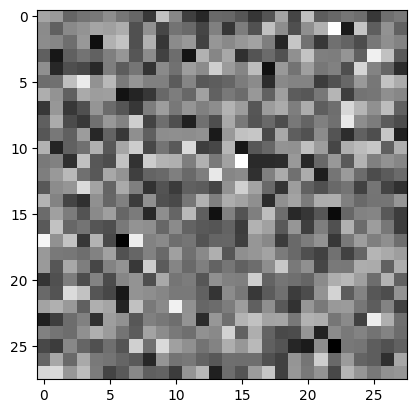

Epoch [0/50], Batch Step [1000/1875], Loss D: 0.3445, Loss G: 0.6992


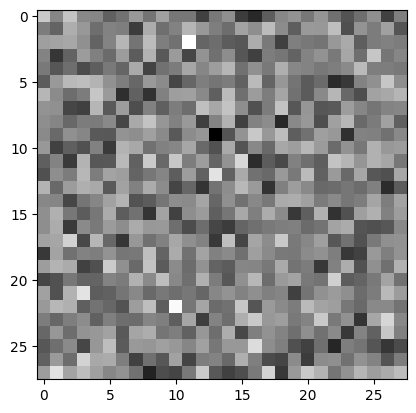

Epoch [1/50], Batch Step [0/1875], Loss D: 0.3443, Loss G: 0.6998


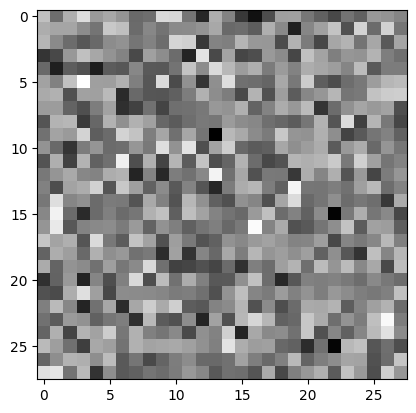

Epoch [1/50], Batch Step [1000/1875], Loss D: 0.3446, Loss G: 0.6993


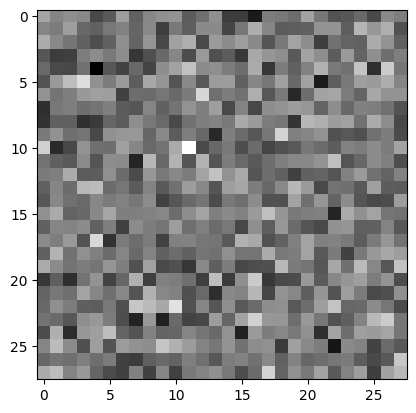

Epoch [2/50], Batch Step [0/1875], Loss D: 0.3440, Loss G: 0.7004


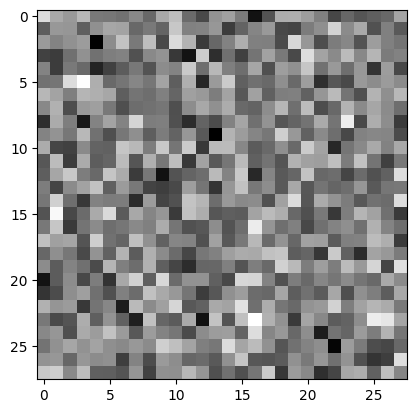

Epoch [2/50], Batch Step [1000/1875], Loss D: 0.3435, Loss G: 0.7016


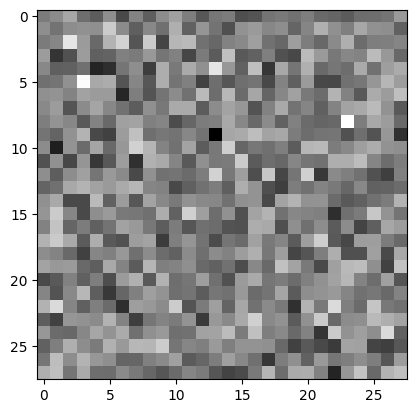

Epoch [3/50], Batch Step [0/1875], Loss D: 0.3411, Loss G: 0.7069


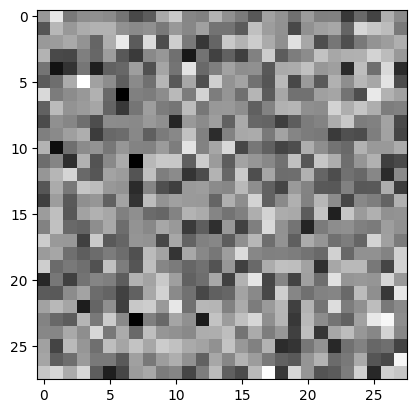

Epoch [3/50], Batch Step [1000/1875], Loss D: 0.3397, Loss G: 0.7094


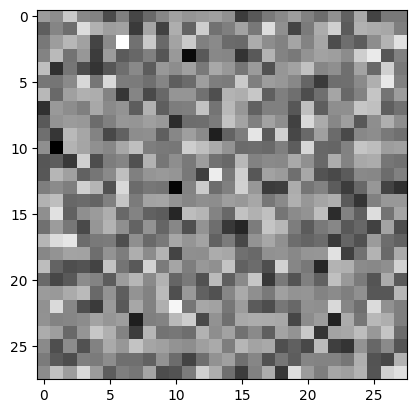

Epoch [4/50], Batch Step [0/1875], Loss D: 0.3391, Loss G: 0.7107


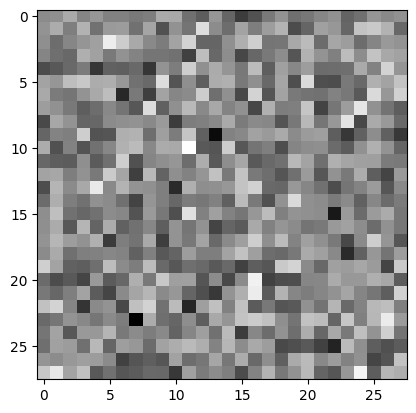

Epoch [4/50], Batch Step [1000/1875], Loss D: 0.3392, Loss G: 0.7103


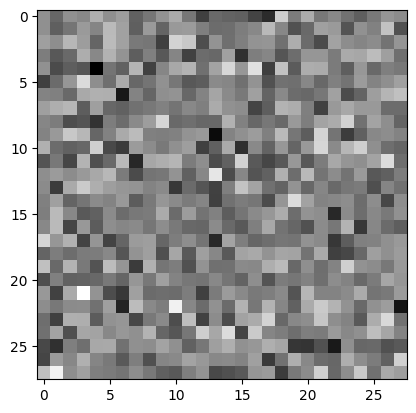

Epoch [5/50], Batch Step [0/1875], Loss D: 0.3381, Loss G: 0.7124


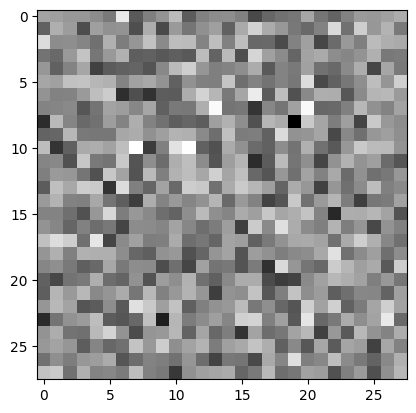

Epoch [5/50], Batch Step [1000/1875], Loss D: 0.3377, Loss G: 0.7133


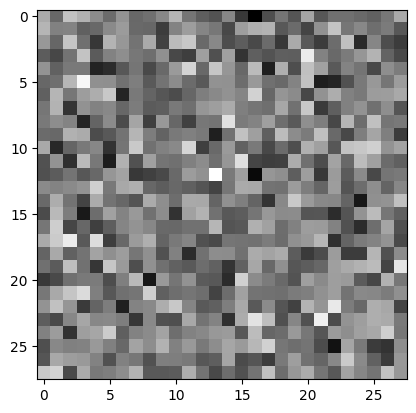

Epoch [6/50], Batch Step [0/1875], Loss D: 0.3372, Loss G: 0.7143


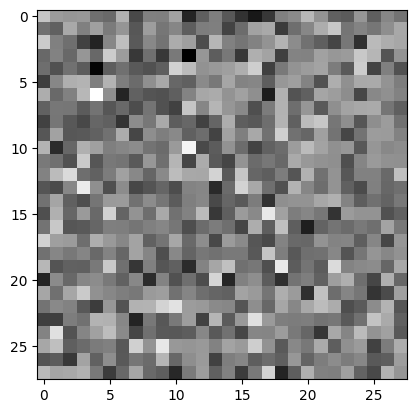

Epoch [6/50], Batch Step [1000/1875], Loss D: 0.3379, Loss G: 0.7126


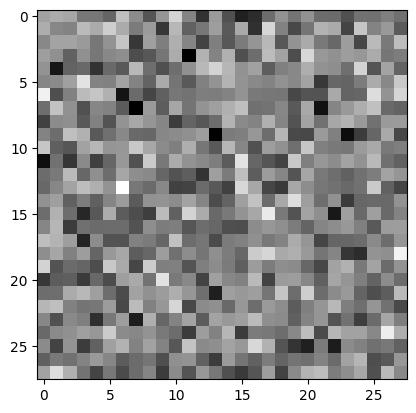

Epoch [7/50], Batch Step [0/1875], Loss D: 0.3371, Loss G: 0.7144


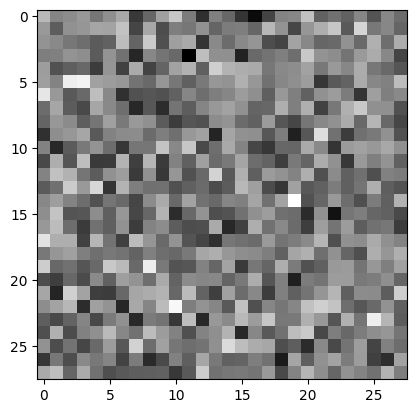

Epoch [7/50], Batch Step [1000/1875], Loss D: 0.3374, Loss G: 0.7137


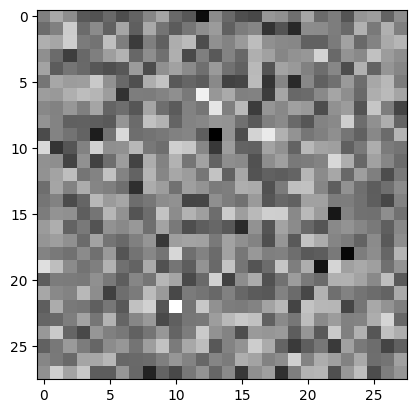

Epoch [8/50], Batch Step [0/1875], Loss D: 0.3357, Loss G: 0.7172


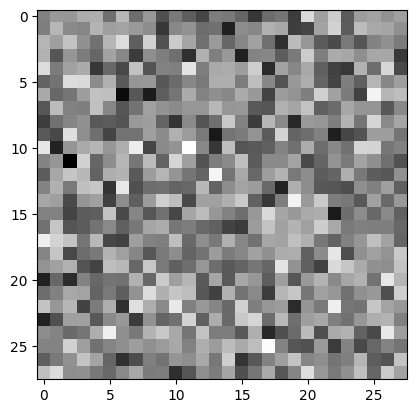

Epoch [8/50], Batch Step [1000/1875], Loss D: 0.3362, Loss G: 0.7161


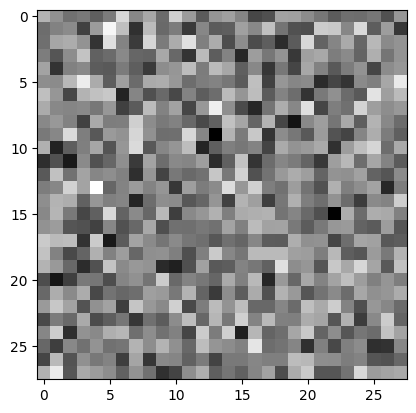

Epoch [9/50], Batch Step [0/1875], Loss D: 0.3348, Loss G: 0.7191


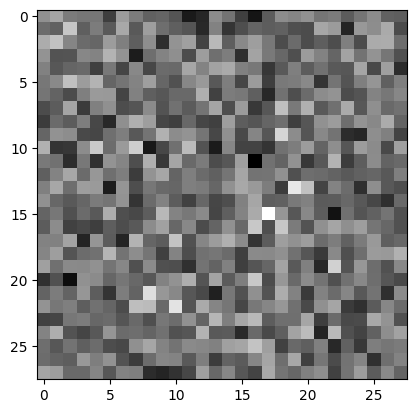

Epoch [9/50], Batch Step [1000/1875], Loss D: 0.3346, Loss G: 0.7194


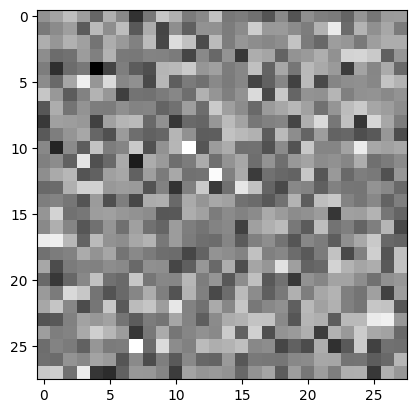

Epoch [10/50], Batch Step [0/1875], Loss D: 0.3361, Loss G: 0.7163


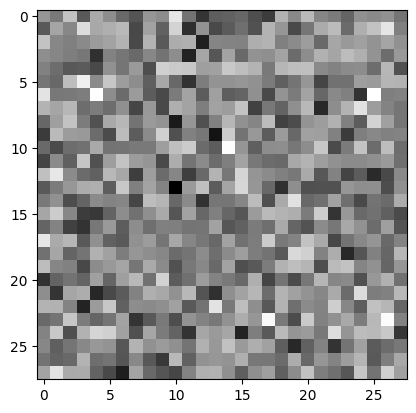

Epoch [10/50], Batch Step [1000/1875], Loss D: 0.3345, Loss G: 0.7196


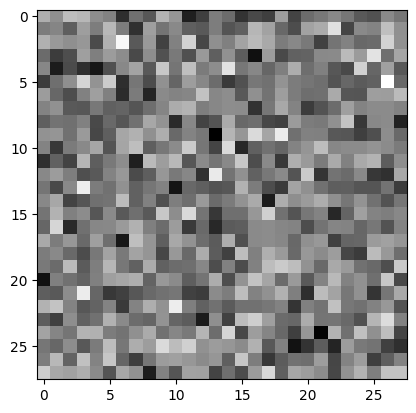

Epoch [11/50], Batch Step [0/1875], Loss D: 0.3340, Loss G: 0.7206


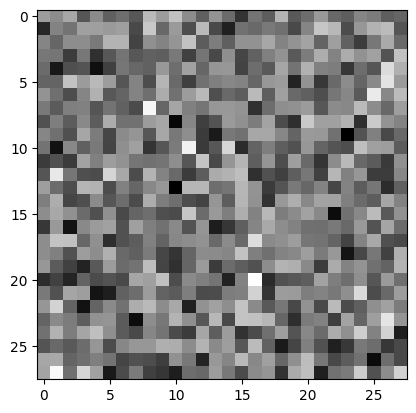

Epoch [11/50], Batch Step [1000/1875], Loss D: 0.3349, Loss G: 0.7187


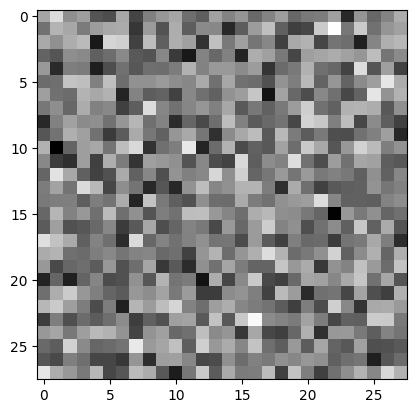

Epoch [12/50], Batch Step [0/1875], Loss D: 0.3334, Loss G: 0.7218


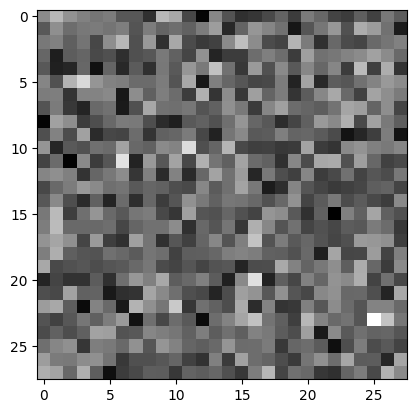

Epoch [12/50], Batch Step [1000/1875], Loss D: 0.3326, Loss G: 0.7236


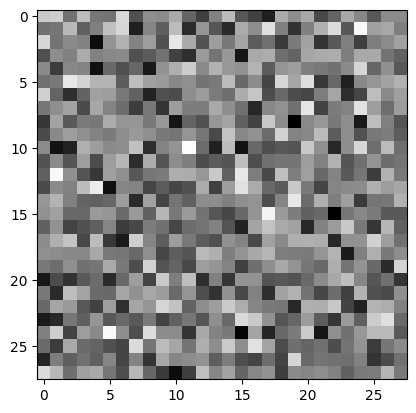

Epoch [13/50], Batch Step [0/1875], Loss D: 0.3334, Loss G: 0.7220


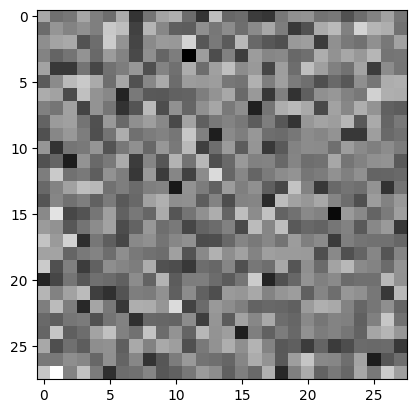

Epoch [13/50], Batch Step [1000/1875], Loss D: 0.3342, Loss G: 0.7201


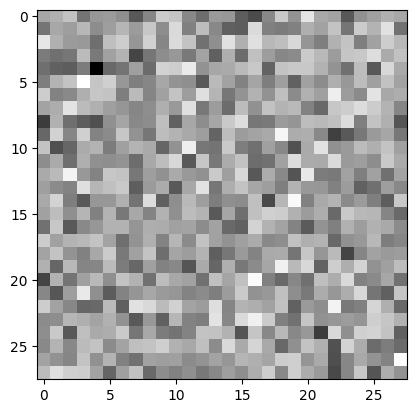

Epoch [14/50], Batch Step [0/1875], Loss D: 0.3337, Loss G: 0.7212


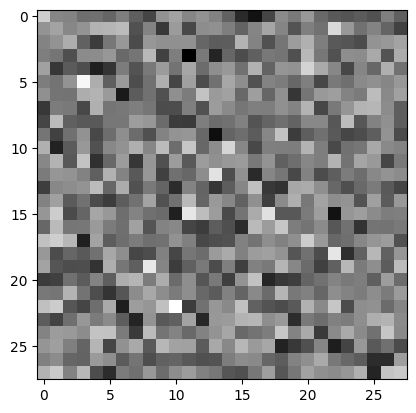

Epoch [14/50], Batch Step [1000/1875], Loss D: 0.3325, Loss G: 0.7238


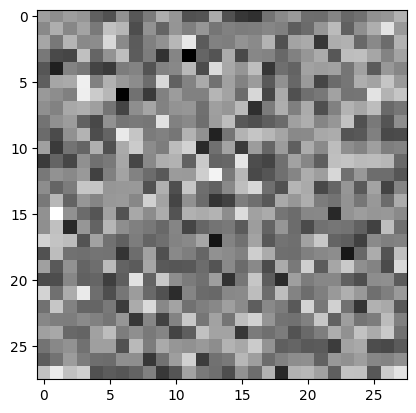

Epoch [15/50], Batch Step [0/1875], Loss D: 0.3319, Loss G: 0.7251


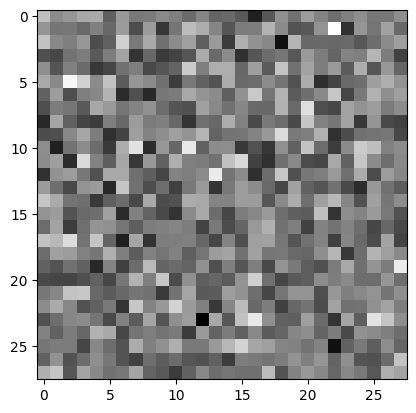

Epoch [15/50], Batch Step [1000/1875], Loss D: 0.3316, Loss G: 0.7256


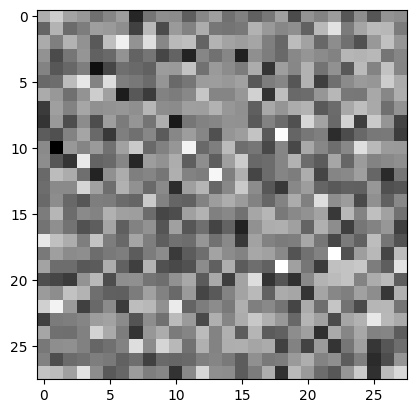

Epoch [16/50], Batch Step [0/1875], Loss D: 0.3302, Loss G: 0.7289


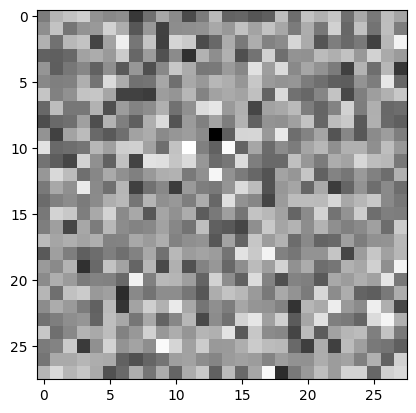

Epoch [16/50], Batch Step [1000/1875], Loss D: 0.3291, Loss G: 0.7313


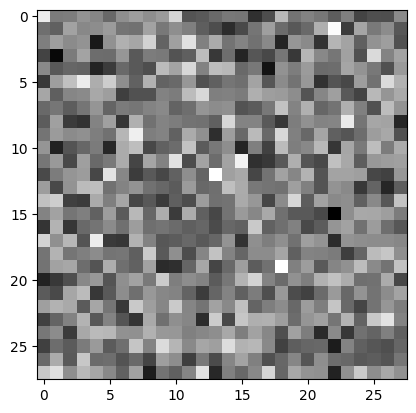

Epoch [17/50], Batch Step [0/1875], Loss D: 0.3312, Loss G: 0.7266


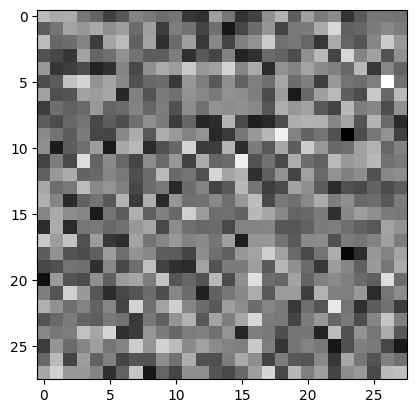

Epoch [17/50], Batch Step [1000/1875], Loss D: 0.3303, Loss G: 0.7286


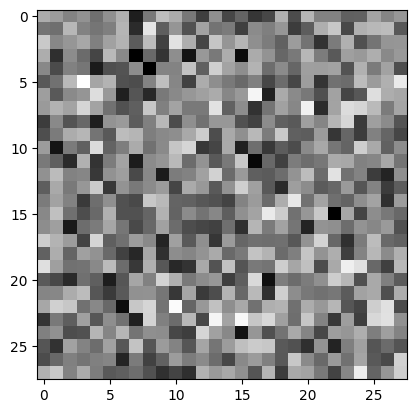

Epoch [18/50], Batch Step [0/1875], Loss D: 0.3300, Loss G: 0.7292


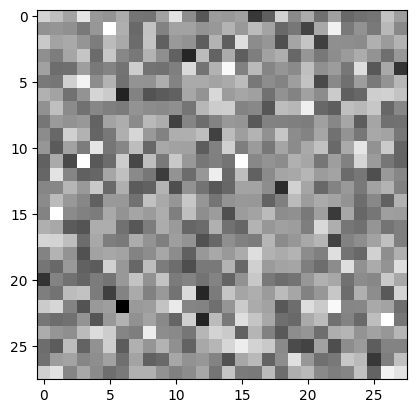

Epoch [18/50], Batch Step [1000/1875], Loss D: 0.3302, Loss G: 0.7286


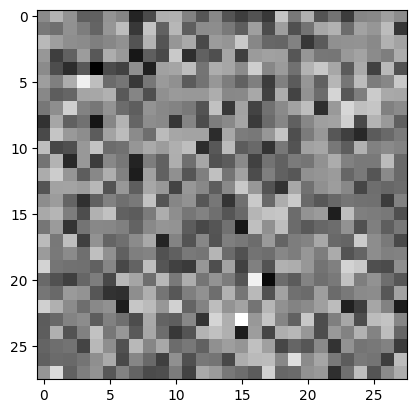

Epoch [19/50], Batch Step [0/1875], Loss D: 0.3286, Loss G: 0.7323


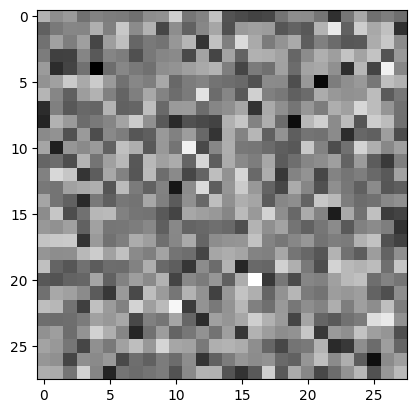

Epoch [19/50], Batch Step [1000/1875], Loss D: 0.3307, Loss G: 0.7275


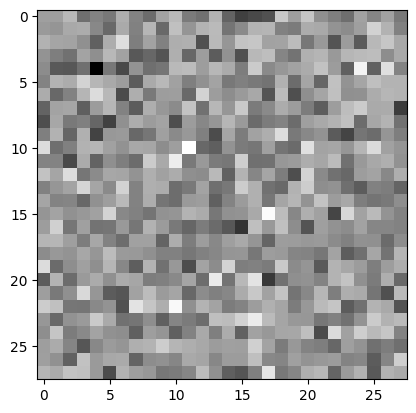

Epoch [20/50], Batch Step [0/1875], Loss D: 0.3298, Loss G: 0.7294


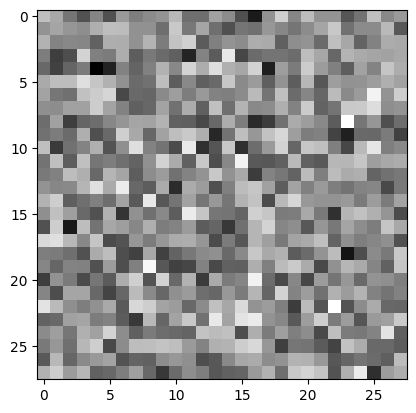

Epoch [20/50], Batch Step [1000/1875], Loss D: 0.3294, Loss G: 0.7304


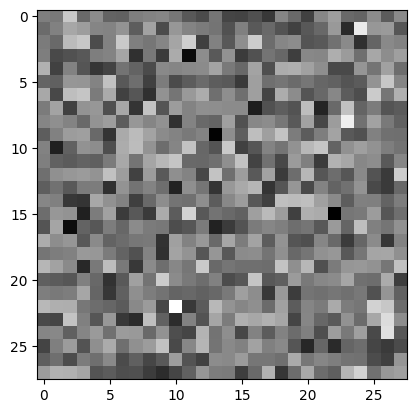

Epoch [21/50], Batch Step [0/1875], Loss D: 0.3265, Loss G: 0.7367


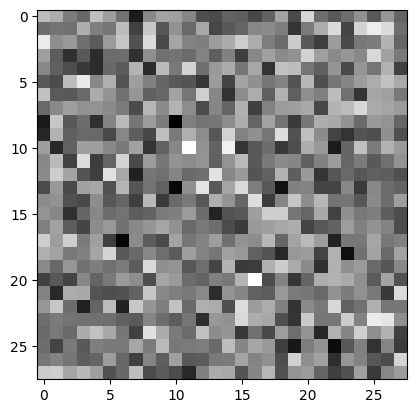

Epoch [21/50], Batch Step [1000/1875], Loss D: 0.3285, Loss G: 0.7324


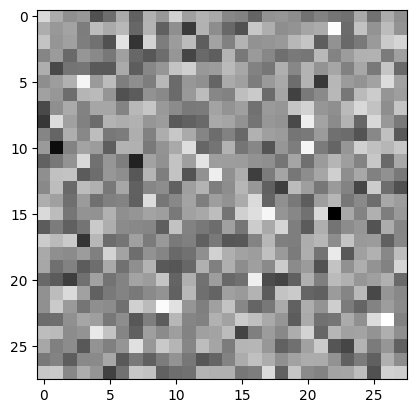

Epoch [22/50], Batch Step [0/1875], Loss D: 0.3286, Loss G: 0.7326


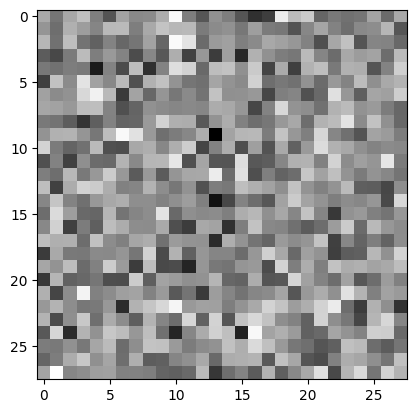

Epoch [22/50], Batch Step [1000/1875], Loss D: 0.3261, Loss G: 0.7380


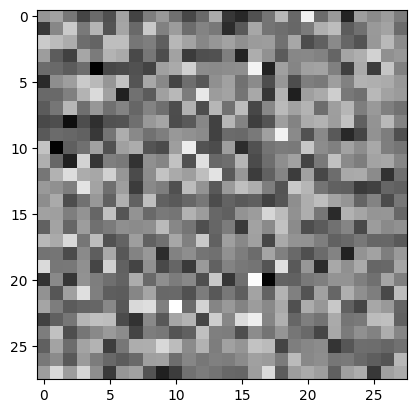

Epoch [23/50], Batch Step [0/1875], Loss D: 0.3274, Loss G: 0.7348


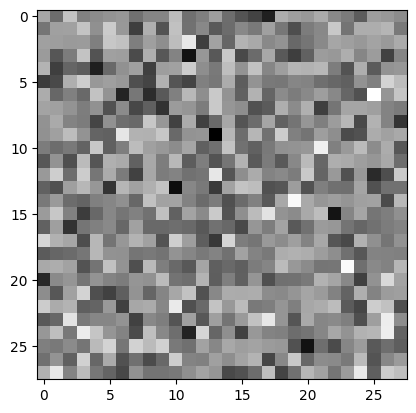

Epoch [23/50], Batch Step [1000/1875], Loss D: 0.3270, Loss G: 0.7357


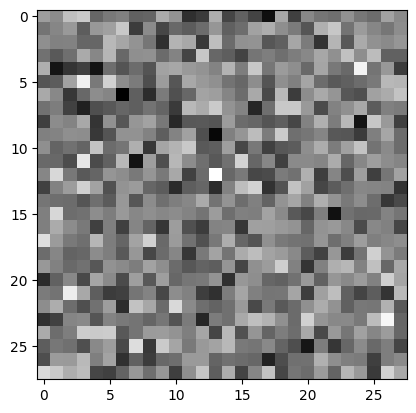

Epoch [24/50], Batch Step [0/1875], Loss D: 0.3232, Loss G: 0.7442


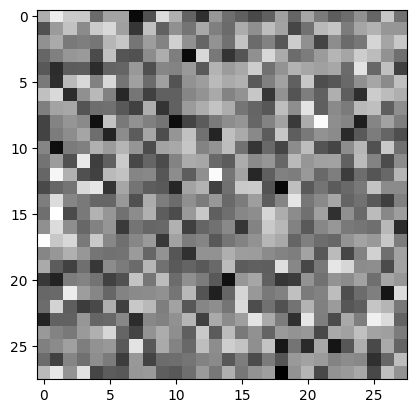

Epoch [24/50], Batch Step [1000/1875], Loss D: 0.3229, Loss G: 0.7452


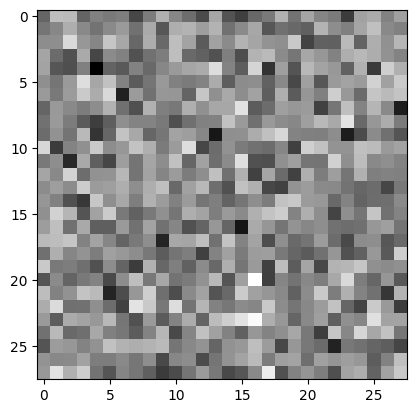

Epoch [25/50], Batch Step [0/1875], Loss D: 0.3259, Loss G: 0.7380


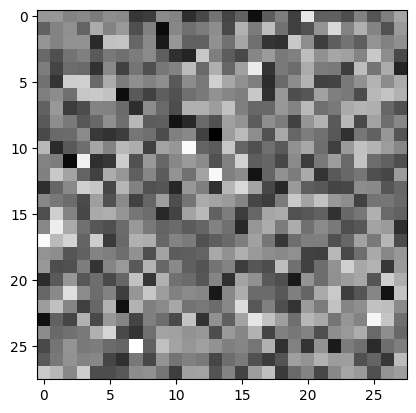

Epoch [25/50], Batch Step [1000/1875], Loss D: 0.3213, Loss G: 0.7484


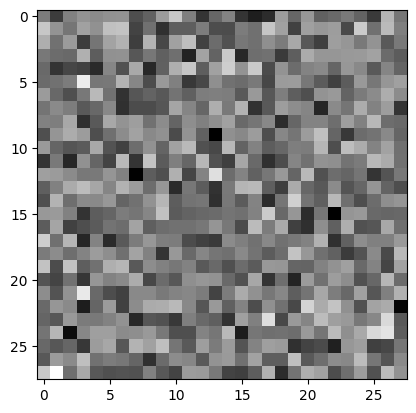

Epoch [26/50], Batch Step [0/1875], Loss D: 0.3254, Loss G: 0.7392


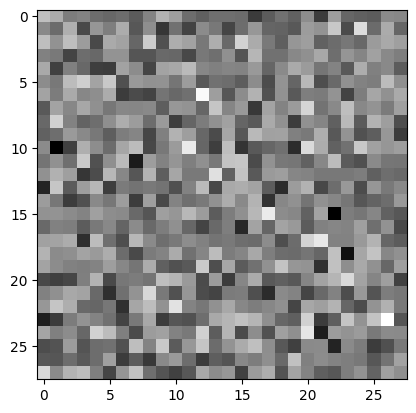

Epoch [26/50], Batch Step [1000/1875], Loss D: 0.3220, Loss G: 0.7471


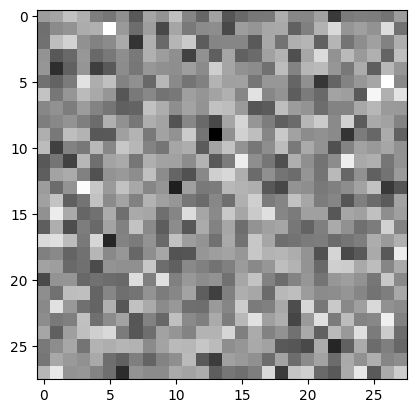

Epoch [27/50], Batch Step [0/1875], Loss D: 0.3217, Loss G: 0.7476


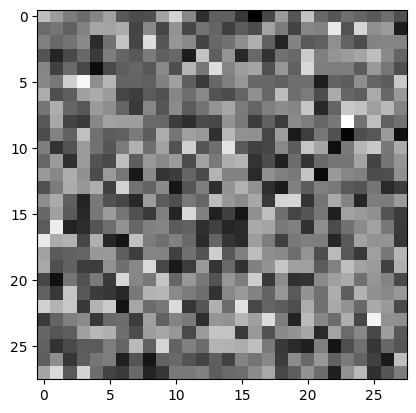

Epoch [27/50], Batch Step [1000/1875], Loss D: 0.3225, Loss G: 0.7455


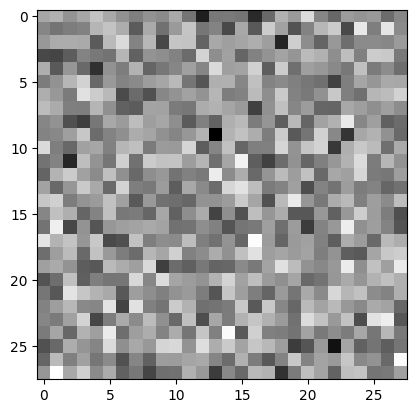

Epoch [28/50], Batch Step [0/1875], Loss D: 0.3222, Loss G: 0.7465


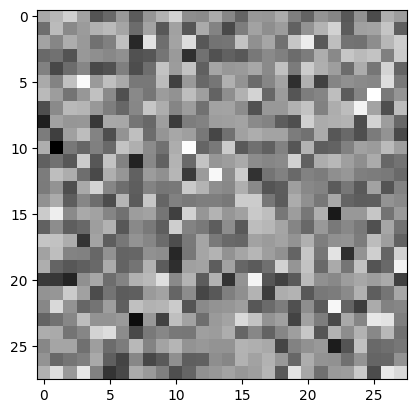

Epoch [28/50], Batch Step [1000/1875], Loss D: 0.3201, Loss G: 0.7516


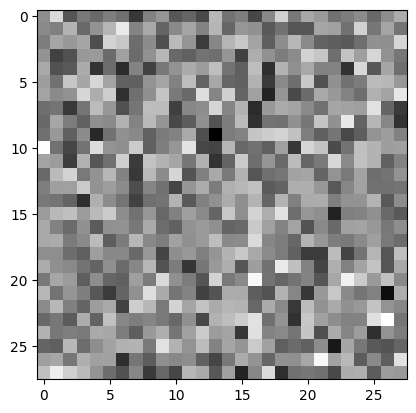

Epoch [29/50], Batch Step [0/1875], Loss D: 0.3236, Loss G: 0.7434


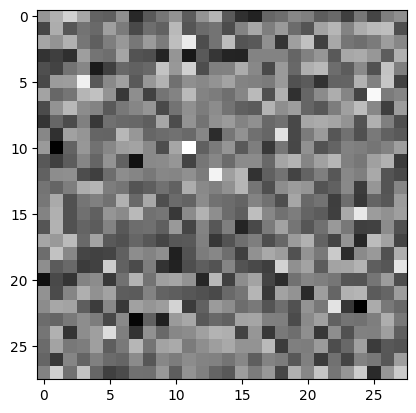

Epoch [29/50], Batch Step [1000/1875], Loss D: 0.3211, Loss G: 0.7490


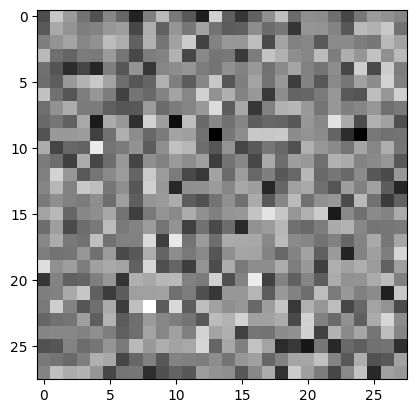

Epoch [30/50], Batch Step [0/1875], Loss D: 0.3212, Loss G: 0.7487


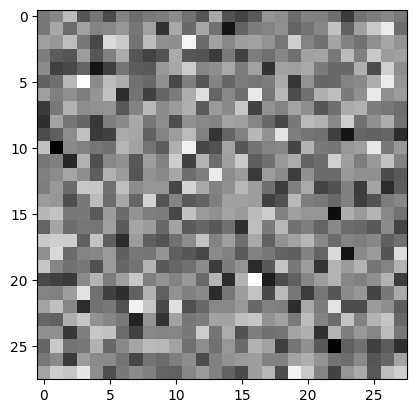

Epoch [30/50], Batch Step [1000/1875], Loss D: 0.3184, Loss G: 0.7550


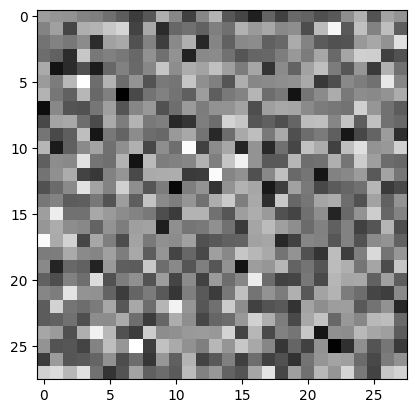

Epoch [31/50], Batch Step [0/1875], Loss D: 0.3198, Loss G: 0.7520


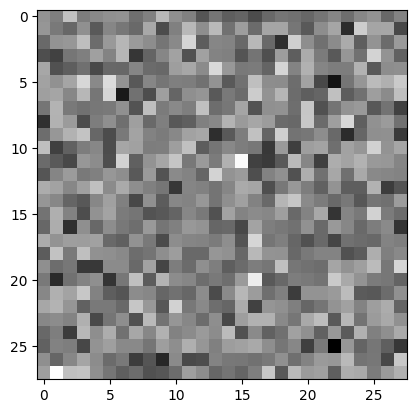

Epoch [31/50], Batch Step [1000/1875], Loss D: 0.3186, Loss G: 0.7545


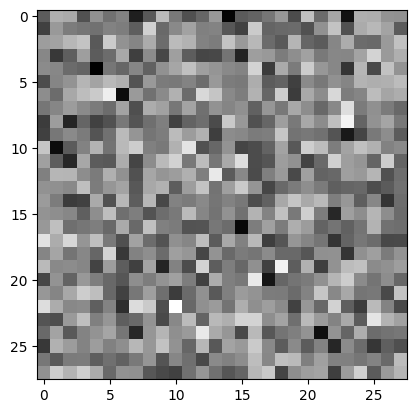

Epoch [32/50], Batch Step [0/1875], Loss D: 0.3184, Loss G: 0.7552


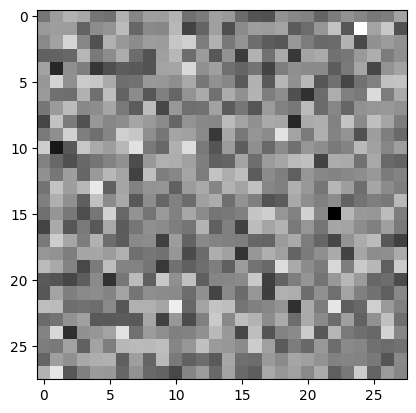

Epoch [32/50], Batch Step [1000/1875], Loss D: 0.3162, Loss G: 0.7607


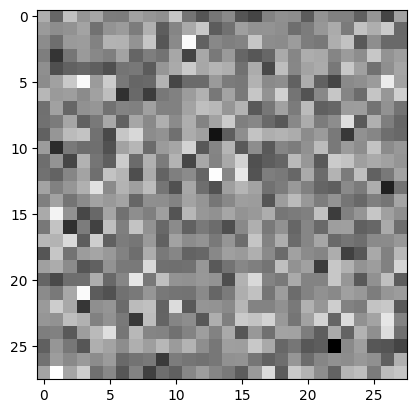

Epoch [33/50], Batch Step [0/1875], Loss D: 0.3176, Loss G: 0.7567


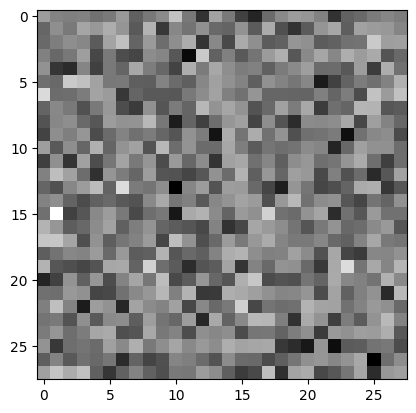

Epoch [33/50], Batch Step [1000/1875], Loss D: 0.3175, Loss G: 0.7574


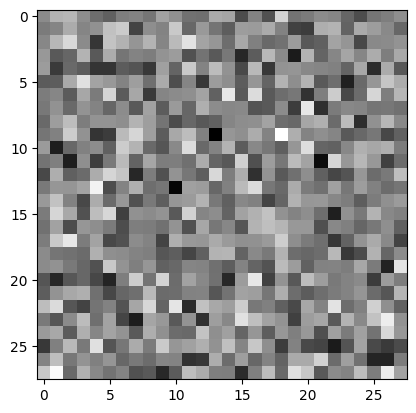

Epoch [34/50], Batch Step [0/1875], Loss D: 0.3198, Loss G: 0.7520


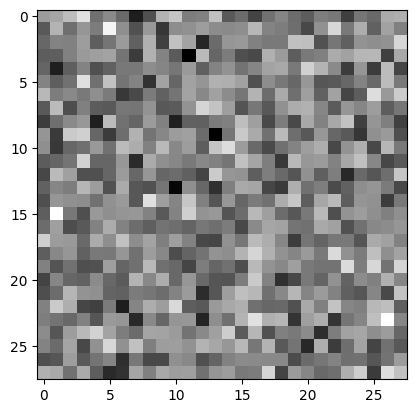

Epoch [34/50], Batch Step [1000/1875], Loss D: 0.3138, Loss G: 0.7660


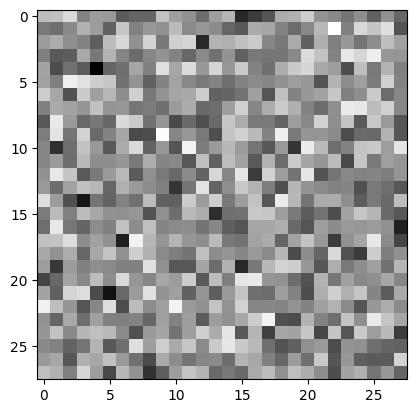

Epoch [35/50], Batch Step [0/1875], Loss D: 0.3138, Loss G: 0.7657


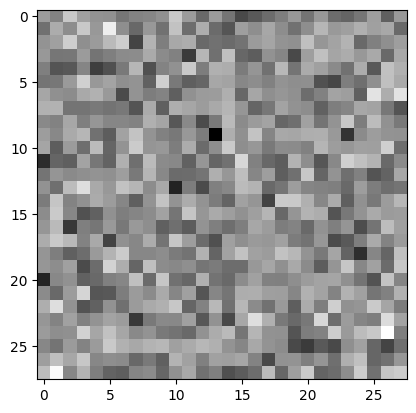

Epoch [35/50], Batch Step [1000/1875], Loss D: 0.3156, Loss G: 0.7620


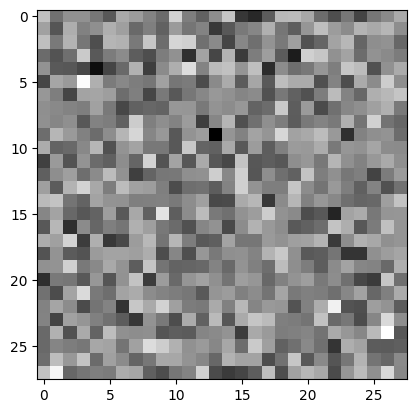

Epoch [36/50], Batch Step [0/1875], Loss D: 0.3135, Loss G: 0.7666


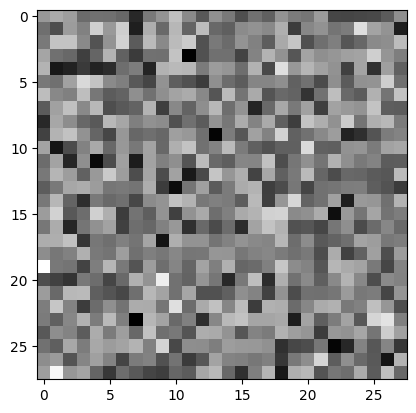

Epoch [36/50], Batch Step [1000/1875], Loss D: 0.3148, Loss G: 0.7637


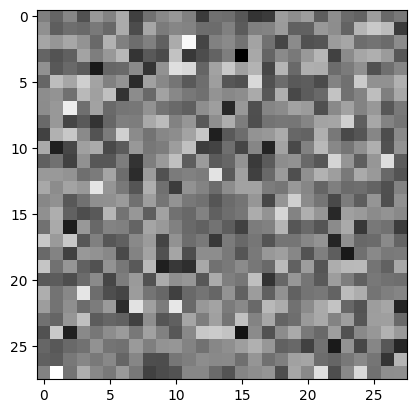

Epoch [37/50], Batch Step [0/1875], Loss D: 0.3161, Loss G: 0.7610


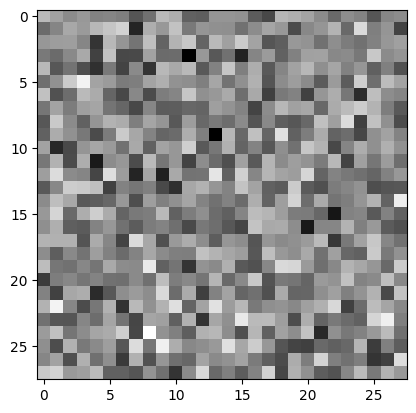

Epoch [37/50], Batch Step [1000/1875], Loss D: 0.3157, Loss G: 0.7614


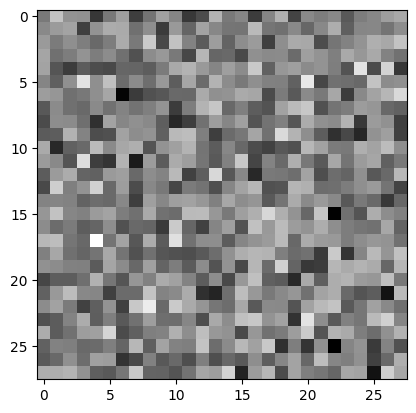

Epoch [38/50], Batch Step [0/1875], Loss D: 0.3152, Loss G: 0.7628


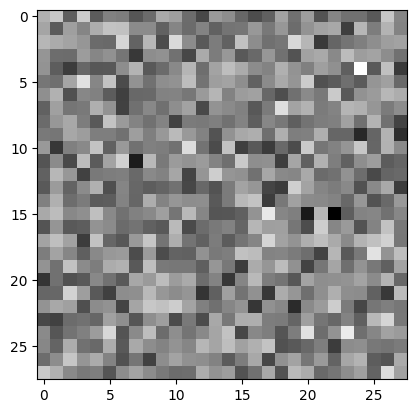

Epoch [38/50], Batch Step [1000/1875], Loss D: 0.3135, Loss G: 0.7666


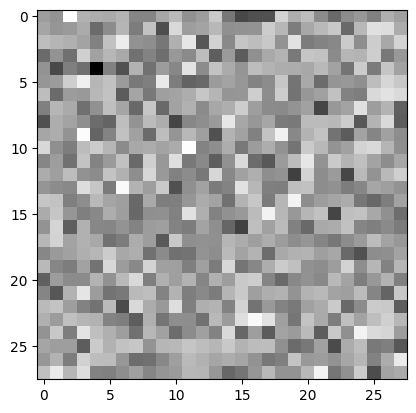

Epoch [39/50], Batch Step [0/1875], Loss D: 0.3110, Loss G: 0.7727


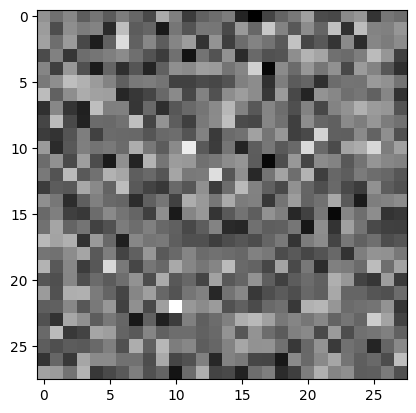

Epoch [39/50], Batch Step [1000/1875], Loss D: 0.3130, Loss G: 0.7677


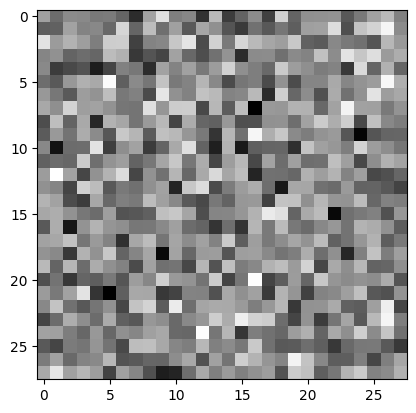

Epoch [40/50], Batch Step [0/1875], Loss D: 0.3147, Loss G: 0.7641


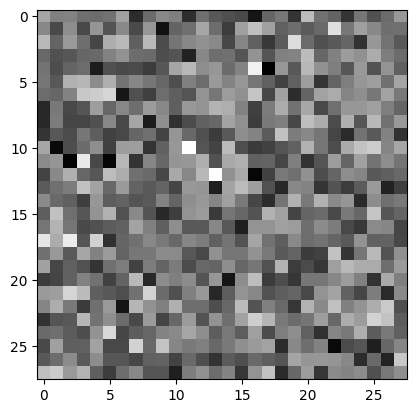

Epoch [40/50], Batch Step [1000/1875], Loss D: 0.3110, Loss G: 0.7727


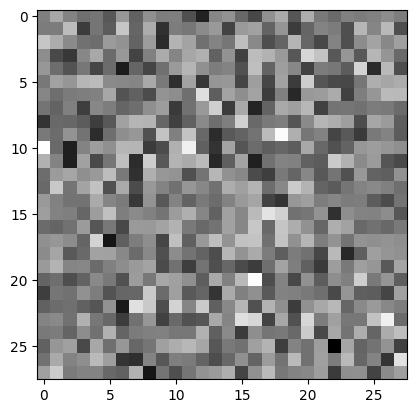

Epoch [41/50], Batch Step [0/1875], Loss D: 0.3119, Loss G: 0.7703


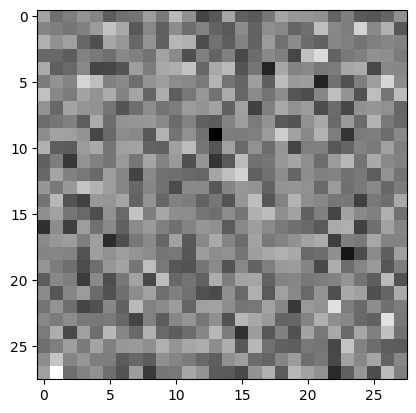

Epoch [41/50], Batch Step [1000/1875], Loss D: 0.3110, Loss G: 0.7728


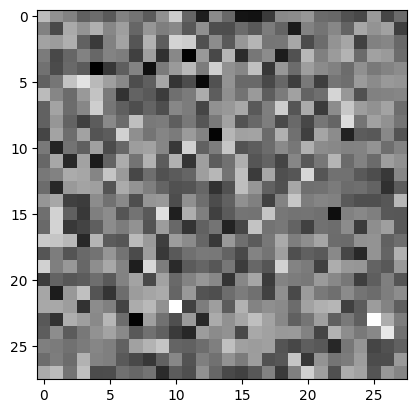

Epoch [42/50], Batch Step [0/1875], Loss D: 0.3109, Loss G: 0.7732


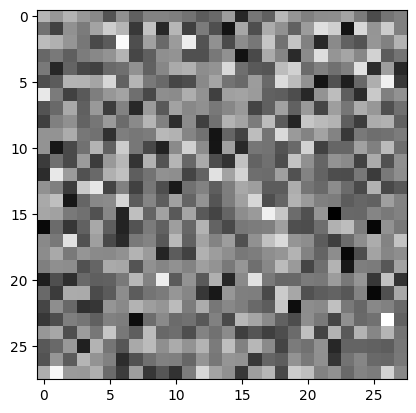

Epoch [42/50], Batch Step [1000/1875], Loss D: 0.3104, Loss G: 0.7739


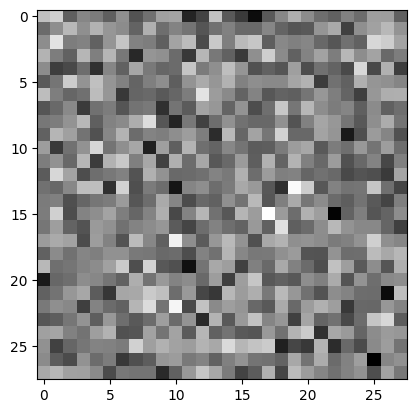

Epoch [43/50], Batch Step [0/1875], Loss D: 0.3117, Loss G: 0.7709


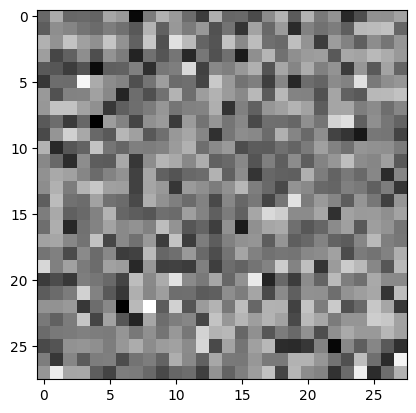

Epoch [43/50], Batch Step [1000/1875], Loss D: 0.3131, Loss G: 0.7683


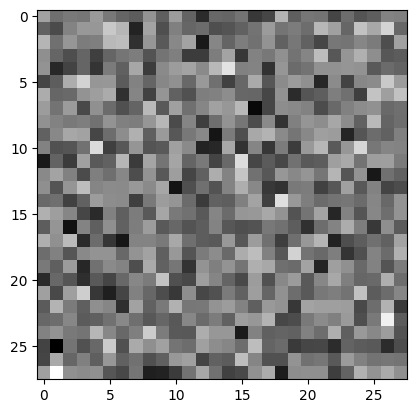

Epoch [44/50], Batch Step [0/1875], Loss D: 0.3088, Loss G: 0.7780


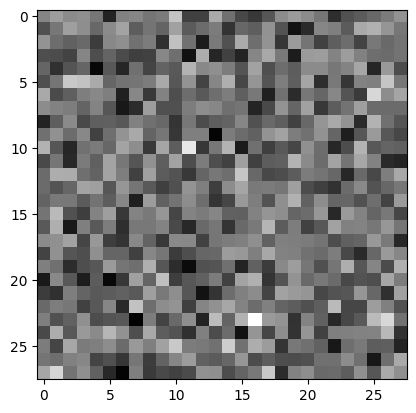

KeyboardInterrupt: 

In [ ]:
step = 0
for epoch in range(num_epoch):
  for batch_idx,(real,_) in enumerate(loader):
    real = real.view(-1,784).to(device)
    batch_size = real.shape[0]

    #Discriminator : max log(D(real)) + log(1-D(G(z)))

    noise = torch.randn(batch_size,z_dim).to(device)
    fake = gen(noise)
    disc_real = disc(real).view(-1)
    lossD_real = criterion(disc_real,torch.ones_like(disc_real))
    disc_fake = disc(fake).view(-1)
    lossD_fake = criterion(disc_fake,torch.zeros_like(disc_fake))
    lossD = (lossD_real + lossD_fake)/2
    disc.zero_grad()
    lossD.backward(retain_graph = True)
    opt_disc.step()

    # Train Generator min log(1-D(G(z)))
    output = disc(fake).view(-1)
    lossG = criterion(output,torch.ones_like(output))
    gen.zero_grad()
    lossG.backward()
    opt_gen.step()

    #Plotting
    if batch_idx % 1000 == 0:
        print(f"Epoch [{epoch}/{num_epoch}], Batch Step [{batch_idx}/{len(loader)}], Loss D: {lossD:.4f}, Loss G: {lossG:.4f}")

        # Plot the generated images
        fig, ax = plt.subplots()
        ax.imshow(fake[0].view(28, 28).cpu().detach().numpy(), cmap='gray')
        plt.show()